## 6.5 Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#  Ensure graphs are later displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path for easier data import
path = r'C:\Users\magia\NY CitiBike\2. Data\Prepared Data'

In [4]:
# Import dataset
df = pd.read_csv(os.path.join(path, 'citibike_cleaned.csv'))

In [5]:
df.shape

(50000, 19)

In [6]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_label,88+_years_old
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,1968,False
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,1983,False
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,1989,False
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,1988,False
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,Unknown,Unknown,False


In [7]:
df.dtypes

bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                      object
birth_year_label            object
88+_years_old                 bool
dtype: object

In [8]:
# drop columns not useful for clustering

df.drop(['bike_id', 'birth_year', 'subscriber','88+_years_old', 'weekday', 'start_time', 
         'end_time', 'start_station_name', 'end_station_name', 'gender', 'birth_year_label', 
         'start_station_id', 'end_station_id', 'end_station_latitude', 'end_station_longitude'
        ], axis=1, inplace=True)

In [9]:
df.dtypes

start_hour                   int64
start_station_latitude     float64
start_station_longitude    float64
trip_duration                int64
dtype: object

In [10]:
print(df.isnull().sum())

start_hour                 0
start_station_latitude     0
start_station_longitude    0
trip_duration              0
dtype: int64


In [11]:
df.shape

(50000, 4)

### 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\magia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\magia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\magia\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\magia\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\magia\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[-16455371249.349716,
 -5204468758.467561,
 -2489083767.699327,
 -1405808902.022359,
 -894992189.5530497,
 -608427066.3852507,
 -448305229.3626258,
 -341784968.9389969,
 -269338779.0227766]

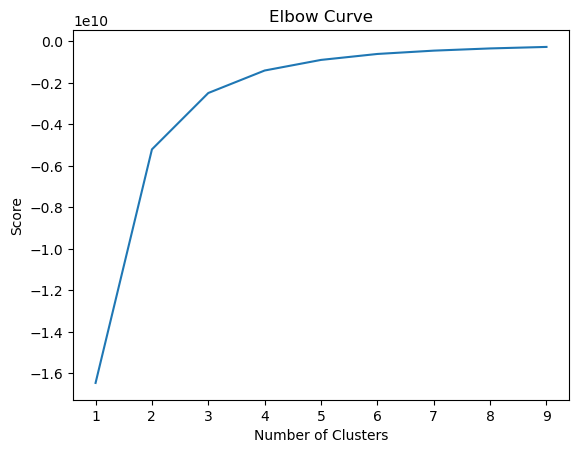

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from 1 to 5 on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is five.

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

In [18]:
df.head()

,start_hour,start_station_latitude,start_station_longitude,trip_duration,clusters
0,18,40.754666,-73.991382,993,1
1,18,40.719392,-74.002472,581,0
2,19,40.760193,-73.991255,361,3
3,11,40.743156,-73.974347,561,0
4,18,40.750450,-73.994811,2296,2


In [19]:
df['clusters'].value_counts()

clusters
3    17294
0    14972
1     9685
4     5651
2     2398
Name: count, dtype: int64

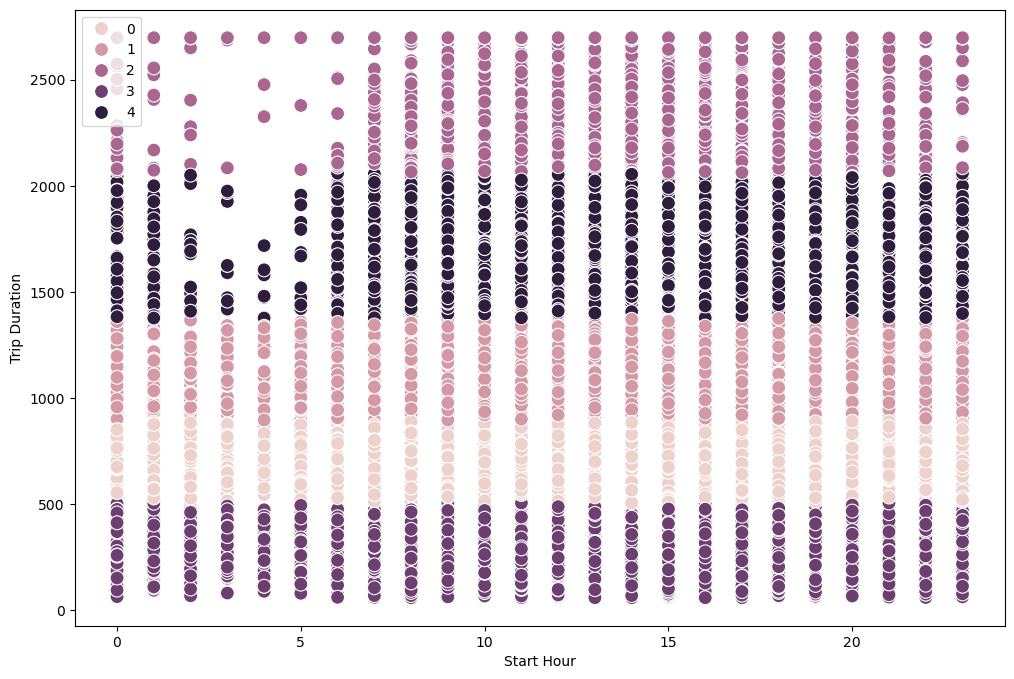

In [20]:
# Plot the clusters for the "Start Hour" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Hour') # Label x-axis.
plt.ylabel('Trip Duration') # Label y-axis.
plt.show()

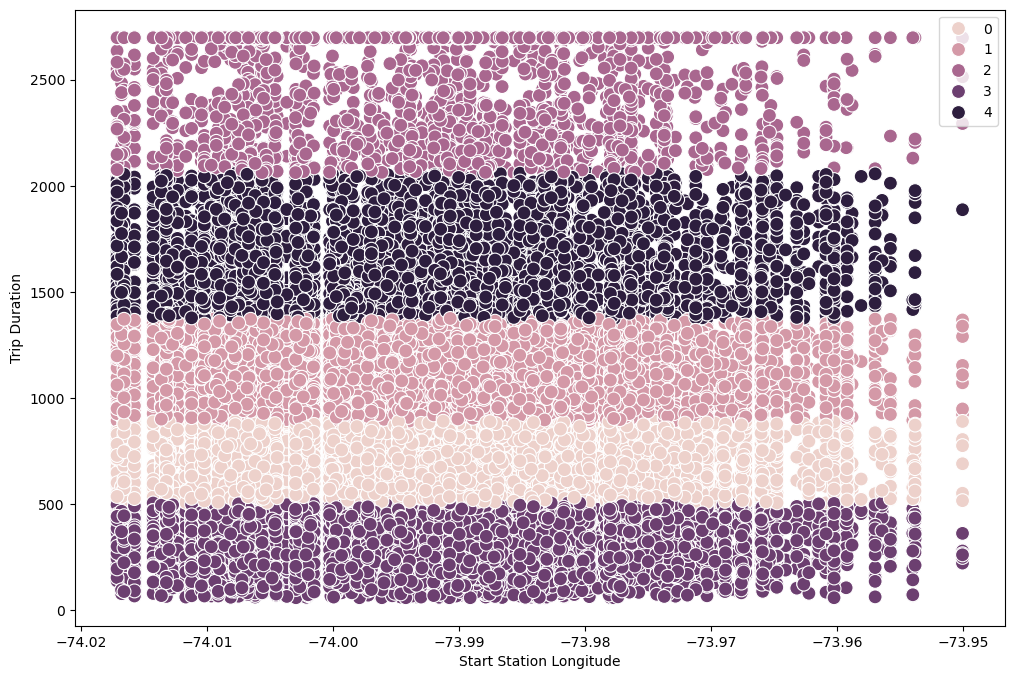

In [21]:
# Plot the clusters for the "Start Station Longitude" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_station_longitude'], y=df['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Start Station Longitude') 
plt.ylabel('Trip Duration') 
plt.show()

In [22]:
# naming clusters

df.loc[df['clusters'] == 4, 'cluster'] = 'midnight plum'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] =  'rose quartz'
df.loc[df['clusters'] == 0, 'cluster'] = 'beigepink'

In [23]:
# summary statistics for clusters

df.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'start_station_latitude':['mean', 'median'], 
                         'start_station_longitude':['mean', 'median'],
                          'trip_duration':['mean', 'median']})

start_hour        start_station_latitude             \
                    mean median                   mean     median   
cluster                                                             
beigepink      14.080417   15.0              40.735809  40.737050   
midnight plum  14.536011   15.0              40.732087  40.732916   
pink           14.320267   15.0              40.733093  40.735243   
purple         13.907367   14.5              40.733857  40.735439   
rose quartz    14.398864   15.0              40.733674  40.735324   

              start_station_longitude            trip_duration          
                                 mean     median          mean  median  
cluster                                                                 
beigepink                  -73.990745 -73.990765    677.790142   667.0  
midnight plum              -73.991858 -73.991580   1646.730844  1617.0  
pink                       -73.990866 -73.990149   2476.286906  2554.5  
purple                     -73.991135 -73.990765    337.085290   345.0  
rose quartz                -73.991249 -73.991218   1107.682602  1094.0

####  Start Hour
- All clusters have a median start hour of 15:00, showing a strong afternoon trend.
- purple starts slightly earlier (mean ~13.9), while
- midnight plum starts the latest (~14.5).

#### Start Station Location
- Latitudes are tightly grouped (~40.732–40.736), suggesting all clusters originate from nearby areas.
- Longitudes hover around ~-73.991, with pink being slightly more eastward.

#### Trip Duration (seconds)
- pink has by far the longest trips (mean ~2480s / ~41 mins).
- midnight plum is next longest (~1640s / ~27 mins).
- purple has the shortest trips (~340s / ~5.7 mins).
- Median trip durations closely mirror the means.

#### K-means clustering of CitiBike trips from September 2013 reveals clear user behavior patterns based on start time and trip duration.

- The purple cluster includes the earliest and shortest trips, likely quick errands / utilitarian rides by locals. These high-turnover trips can inform dock management and bike redistribution.
- Midnight plum trips start latest and are much longer, suggesting leisure rides or long commutes outside peak hours. This cluster can help adjust bike availability and pricing for extended use.
- The pink cluster shows the longest trips with slightly late start times—possibly tourists or long-distance commuters. These insights are useful for identifying heavy users or planning around popular long routes.
- Rose quartz start a bit later and  are mid trip lengths, suggesting a mix of leisure and practical use—helpful for targeting hybrid usage zones.
- Beigepink trips start at average time and are short-to-midlength, possibly regular commutes.